# Practical analysis of advanced algorithms

**Goal**

Practical analysis of advanced algorithms.

In [ ]:
!/usr/local/bin/python3.10 -m pip install ipykernel -U --user --force-reinstall

In [40]:
import numpy as np
import time
import statistics
import math
from heapq import heappop, heappush
import tracemalloc

In [3]:
def maxCrossingSum(arr, l, m, h):

	# Include elements on left of mid.
	sm = 0
	left_sum = -10000

	for i in range(m, l-1, -1):
		sm = sm + arr[i]

		if (sm > left_sum):
			left_sum = sm

	# Include elements on right of mid
	sm = 0
	right_sum = -1000
	for i in range(m, h + 1):
		sm = sm + arr[i]

		if (sm > right_sum):
			right_sum = sm

	# Return sum of elements on left and right of mid
	# returning only left_sum + right_sum will fail for [-2, 1]
	return max(left_sum + right_sum - arr[m], left_sum, right_sum)


# Returns sum of maximum sum subarray in aa[l..h]
def maxSubArraySum(arr, l, h):
	#Invalid Range: low is greater than high
	if (l > h):
		return -10000
	# Base Case: Only one element
	if (l == h):
		return arr[l]

	# Find middle point
	m = (l + h) // 2

	# Return maximum of following three possible cases
	# a) Maximum subarray sum in left half
	# b) Maximum subarray sum in right half
	# c) Maximum subarray sum such that the
	#	 subarray crosses the midpoint
	return max(maxSubArraySum(arr, l, m-1),
			maxSubArraySum(arr, m+1, h),
			maxCrossingSum(arr, l, m, h))


In [4]:
def selectActivities(s, f):
	ans = []
	p = []

	# pushing elements in the list
	for i, j in zip(s, f):
		heappush(p, (j, i))

	it = heappop(p)
	start = it[1]
	end = it[0]
	ans.append(it)

	# sorting process
	while p:
		it = heappop(p)
		if it[1] >= end:
			start = it[1]
			end = it[0]
			ans.append(it)

	# print("Following Activities should be selected.\n")
	# for f, s in ans:
	# 	print(f"Activity started at {s} and ends at {f}")
	return

In [12]:
def getAverageRunningTime(N, func, *args):
    ts = []
    for i in range(N):
        start = time.time()
        func(*args)
        end = round(time.time() - start, 3)
        ts.append(end)

    return statistics.mean(ts)

def measure_memory(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / 10**6

In [48]:
ts = []
array_size = []
mem = []

for i in range(10, 3000):
    # generate random array
    A = np.random.randint(low=-i, high=i, size=i)

    avg_time = getAverageRunningTime(5, maxSubArraySum, A, 0, len(A)-1)
    avg_mem = measure_memory(maxSubArraySum, A, 0, len(A)-1)

    ts.append(avg_time)
    mem.append(avg_mem)
    array_size.append(i)

## The maximum-subarray problem. Visualization

### Time Complexity

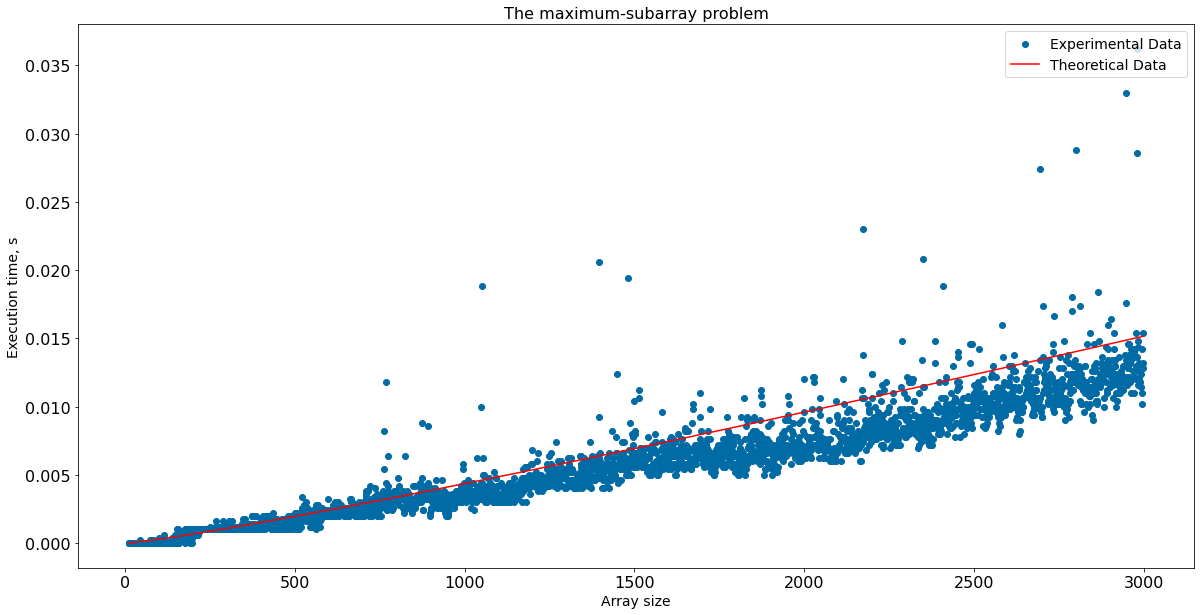

In [53]:
from tkinter import font
from matplotlib import pyplot

def time_complexity(N):
    return N*math.log(N)

pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))

pyplot.scatter(array_size, ts,  label='Experimental Data')
pyplot.plot(array_size, [time_complexity(N)/pow(10,6.2) for N in array_size], 
            label='Theoretical Data', color='red')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('The maximum-subarray problem', fontsize=16)
pyplot.xlabel("Array size", fontsize=14)
pyplot.ylabel("Execution time, s", fontsize=14)
pyplot.show()

### Space Complexity

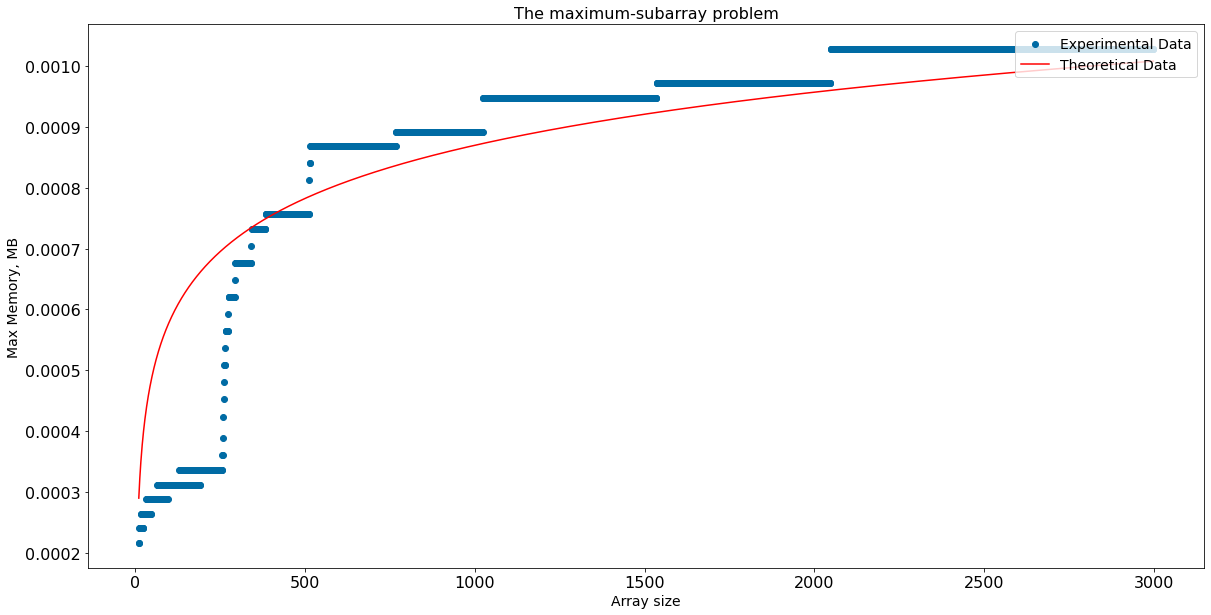

In [68]:
pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))

pyplot.scatter(array_size, mem,  label='Experimental Data')
pyplot.plot(array_size, [math.log(N)/10**3.9 for N in array_size], 
            label='Theoretical Data', color='red')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('The maximum-subarray problem', fontsize=16)
pyplot.xlabel("Array size", fontsize=14)
pyplot.ylabel("Max Memory, MB", fontsize=14)
pyplot.show()

## The activity selection problem

In [44]:
ts_activities = []
array_size_activities = []
mem_activities = []

for i in range(10, 2000):
    s = np.random.randint(low=0, high=i, size=i)
    f = np.random.randint(low=0, high=i, size=i)

    # avg_time = getAverageRunningTime(5, selectActivities, s, f)
    avg_mem = measure_memory(selectActivities, s, f)

    mem_activities.append(avg_mem)
    # ts_activities.append(avg_time)
    array_size_activities.append(i)

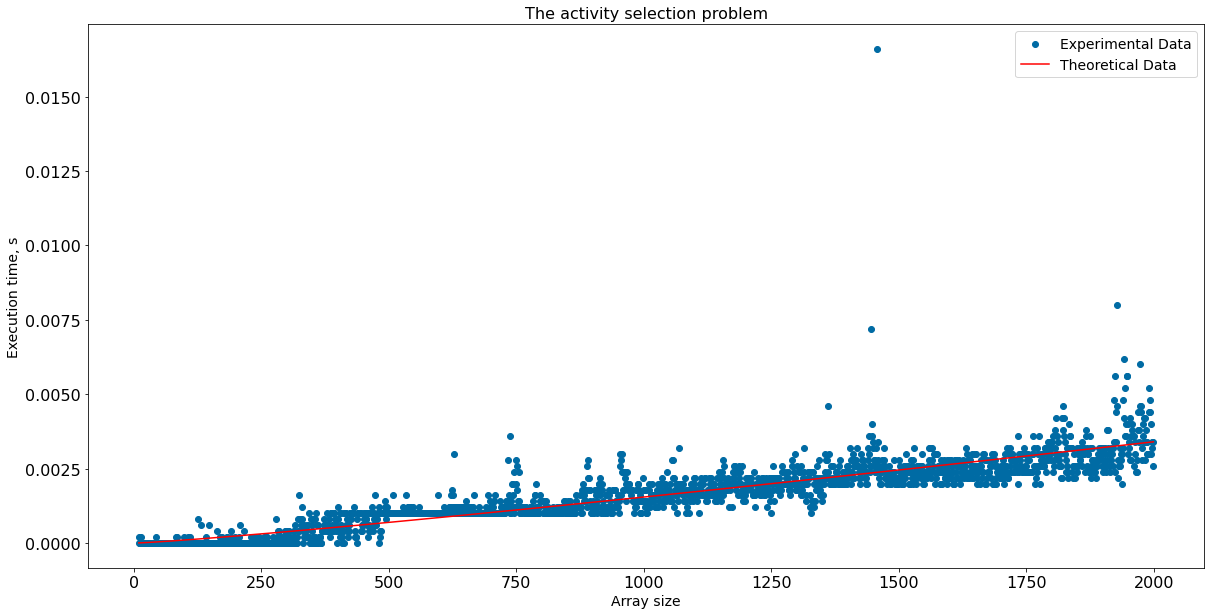

In [10]:
from tkinter import font
from matplotlib import pyplot

def time_complexity(N):
    return N*math.log(N)

pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))

pyplot.scatter(array_size_activities, ts_activities,  label='Experimental Data')
pyplot.plot(array_size_activities, [time_complexity(N)/pow(10,6.65) for N in array_size_activities], 
            label='Theoretical Data', color='red')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('The activity selection problem', fontsize=16)
pyplot.xlabel("Array size", fontsize=14)
pyplot.ylabel("Execution time, s", fontsize=14)
pyplot.show()

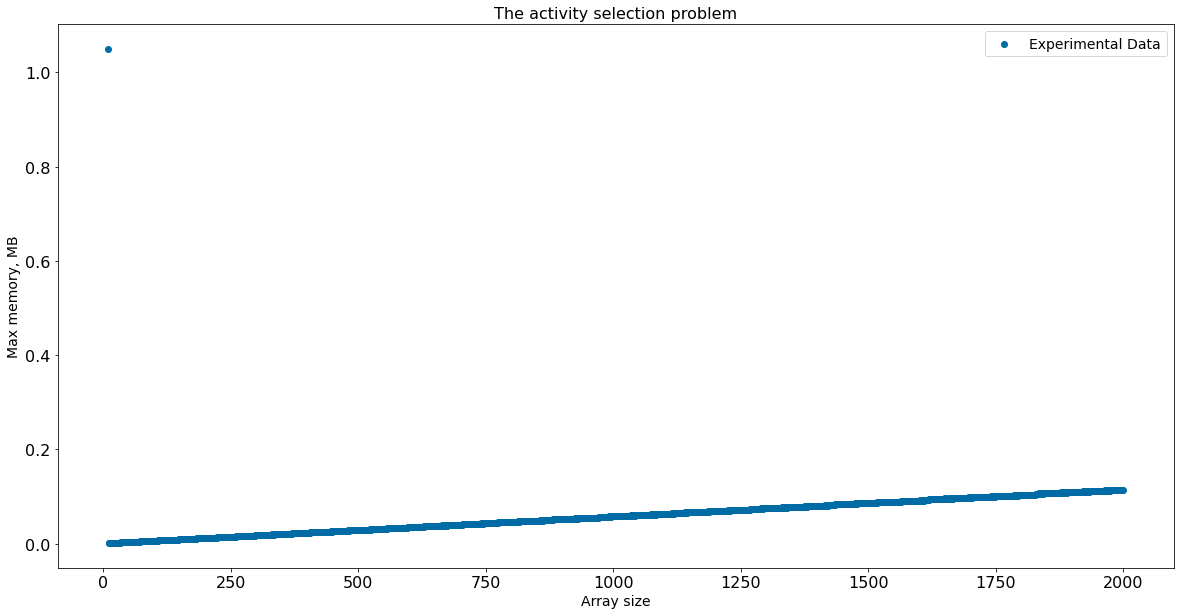

In [45]:
def space_complexity(N):
    return N

pyplot.style.use('tableau-colorblind10')

pyplot.figure(figsize=(20, 10))

pyplot.scatter(array_size_activities, mem_activities,  label='Experimental Data')
# pyplot.plot(array_size_activities, [space_complexity(N)/10**4.2 for N in array_size_activities], 
#             label='Theoretical Data', color='red')

pyplot.yticks(fontsize=16)
pyplot.xticks(fontsize=16)
pyplot.legend(loc='upper right', fontsize=14)
pyplot.title('The activity selection problem', fontsize=16)
pyplot.xlabel("Array size", fontsize=14)
pyplot.ylabel("Max memory, MB", fontsize=14)
pyplot.show()